In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
filename='vid.mp4'
vid=cv2.VideoCapture(filename)

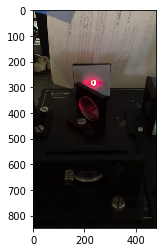

In [3]:
successful_read,frame = vid.read()
frame=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
plt.imshow(frame)

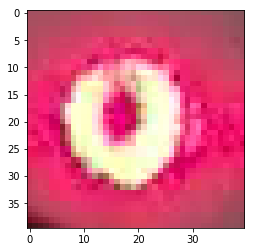

In [4]:
def find_dot(channel, threshold=250,window_size=20):
    """Return crop xmin,xmax,yminymax.
       
       channel: the img/channel to use in order to find the dot (e.g. the red channel of a frame)
       threshold: minimum value of pixels in channel to be considered part of average for dot finding
       window_size: the img will be cropped to a box at the mean point +/- window_size
    
    """
    red_pixels=[]
    for i in range(channel.shape[0]):
        for j in range(channel.shape[1]):
            if channel[i,j] > threshold:
                    red_pixels.append([i,j])
    dotx,doty=np.round(np.mean(red_pixels,axis=0))
    dotx,doty=int(dotx),int(doty)
    return dotx-window_size,dotx+window_size,doty-window_size,doty+window_size
xmin,xmax,ymin,ymax=find_dot(frame[:,:,0])
plt.imshow(frame[xmin:xmax,ymin:ymax])

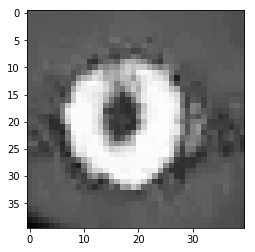

131.94375


In [5]:
successful_read,frame = vid.read()
red_channel=frame[:,:,2]
xmin,xmax,ymin,ymax=find_dot(red_channel)
frame=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
gray_cropped_frame=frame[xmin:xmax,ymin:ymax]
plt.imshow(gray_cropped_frame,cmap='gray')
plt.show()
print(np.mean(gray_cropped_frame))

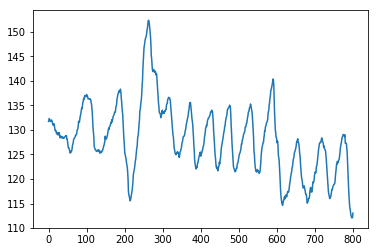

In [6]:
import sys

vid=cv2.VideoCapture(filename)
successful_read,frame = vid.read()
red_channel=frame[:,:,2]
xmin,xmax,ymin,ymax=find_dot(red_channel)
means=[]
i=0
while successful_read:
    i+=1
    sys.stdout.write("Frame {}\r".format(i))
    sys.stdout.flush()
    frame=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    gray_cropped_frame=frame[xmin:xmax,ymin:ymax]
    means.append(np.mean(gray_cropped_frame))
    successful_read,frame = vid.read()
    if i%200==0: xmin,xmax,ymin,ymax=find_dot(frame[:,:,2])
    if i>800: break
means=np.array(means)
plt.plot(means)

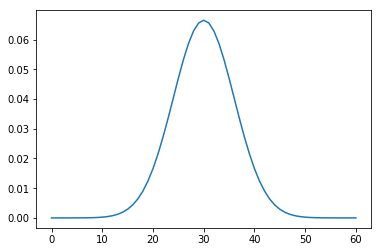

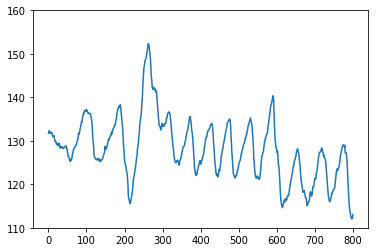

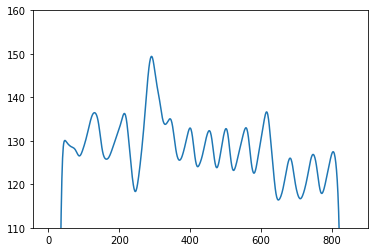

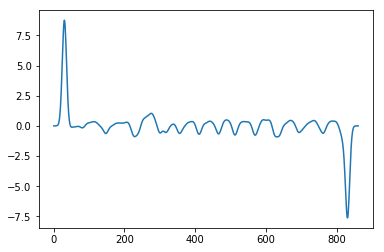

In [7]:
sig=6
k=1/(sig*np.sqrt(2*np.pi)) * np.exp(-np.arange(-30,31)**2 / (2*(sig**2)))
plt.plot(k)
plt.show()
plt.plot(means)
plt.ylim(110,160)
plt.show()
plt.plot(np.convolve(k,means))
plt.ylim(110,160)
plt.show()
plt.plot(np.convolve(np.convolve(k,means),[1,-1]))

In [9]:
import scipy.signal

12


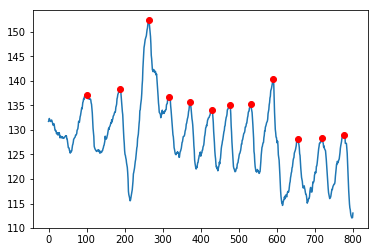

In [42]:
peaks, properties = scipy.signal.find_peaks(means,prominence=4)
plt.plot(means)
plt.plot(peaks,[means[p] for p in peaks],'ro')
print(len(peaks))